# Assignment 6 #

### Group 3 ###

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tiingo import TiingoClient
import numpy as np
from datetime import date
import warnings
warnings.filterwarnings('ignore')
from dateutil.relativedelta import relativedelta
config = {}

config['session'] = True

config['api_key'] = "110ee73e29ec4269f49eb85cfb4b976ab8e73361"

client = TiingoClient(config)

In [3]:
def download_financial_data(ticker):
    fin_data = client.get_ticker_price(ticker,
                                       fmt='csv',
                                       startDate = date.today() - relativedelta(years=5),
                                       endDate = date.today(),
                                       frequency = 'daily')
    file_name = f"{ticker}.csv"
    with open(file_name,'w') as outfile:
        outfile.write(fin_data)
    print(f'{ticker}.csv created')
    return pd.read_csv(f"{ticker}.csv")

In [52]:
gold_df = pd.read_csv("Gold_data.csv")
btc_df = download_financial_data('btcusd')
spy_df = download_financial_data('SPY')

btcusd.csv created
SPY.csv created


In [5]:
gold_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,5/27/2022,1857.3,119997.0,1855.1,1866.9,1851.9
1,5/26/2022,1853.9,88345.0,1857.9,1859.0,1842.5
2,5/25/2022,1852.5,95996.0,1871.2,1872.7,1845.0
3,5/24/2022,1871.4,69225.0,1858.6,1875.0,1853.9
4,5/23/2022,1853.9,57586.0,1850.9,1870.4,1849.7


In [54]:
spy_df['date'] = pd.to_datetime(spy_df['date'])

In [ ]:
btc_df['date'] = pd.to_datetime(btc_df['date'])
gold_df['date'] = pd.to_datetime(gold_df['date'])

btc_df.sort_values(by = 'date',ascending = False).head()

In [18]:
gold_df['returns'] = gold_df['Close/Last'].pct_change(1)
btc_df['returns'] = btc_df['close'].pct_change(1)

In [34]:
gold_df = gold_df.rename(columns = {"Close/Last" : "gold_close"})
btc_df = btc_df.rename(columns = {"close" : "btc_close"})

In [35]:
gold_df = gold_df.rename(columns = {"Date" : "date"})
gold_df.head()

,date,gold_close,Volume,Open,High,Low,returns
0,5/27/2022,1857.3,119997.0,1855.1,1866.9,1851.9,NaN
1,5/26/2022,1853.9,88345.0,1857.9,1859.0,1842.5,-0.001831
2,5/25/2022,1852.5,95996.0,1871.2,1872.7,1845.0,-0.000755
3,5/24/2022,1871.4,69225.0,1858.6,1875.0,1853.9,0.010202
4,5/23/2022,1853.9,57586.0,1850.9,1870.4,1849.7,-0.009351


In [39]:
df = gold_df.merge(btc_df,on="date",how="left")
df.dropna(inplace=True)
df.head()

,date,gold_close,Volume,Open,High,Low,returns_x,btc_close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,returns_y
1,2022-05-26,1853.9,88345.0,1857.9,1859.0,1842.5,-0.001831,29258.072989,29874.255055,28090.363444,29530.370750,53314.779656,29258.072989,29874.255055,28090.363444,29530.370750,53314.779656,0.0,1.0,-0.009280
2,2022-05-25,1852.5,95996.0,1871.2,1872.7,1845.0,-0.000755,29532.119065,30215.489191,29296.848344,29645.002294,51161.106553,29532.119065,30215.489191,29296.848344,29645.002294,51161.106553,0.0,1.0,-0.003961
3,2022-05-24,1871.4,69225.0,1858.6,1875.0,1853.9,0.010202,29649.567729,29816.472086,28675.169540,29102.269330,51601.374198,29649.567729,29816.472086,28675.169540,29102.269330,51601.374198,0.0,1.0,0.018909
4,2022-05-23,1853.9,57586.0,1850.9,1870.4,1849.7,-0.009351,29099.315853,30645.789611,28902.064158,30280.792476,47366.035102,29099.315853,30645.789611,28902.064158,30280.792476,47366.035102,0.0,1.0,-0.039119
5,2022-05-20,1848.4,40522.0,1847.4,1854.0,1837.3,-0.002967,29183.305230,30701.953764,28714.536819,30305.197864,51032.611873,29183.305230,30701.953764,28714.536819,30305.197864,51032.611873,0.0,1.0,-0.037892


In [55]:
df = df.merge(spy_df,on="date",how="left")
df = df.dropna()
df.head()

,date,gold_close,Volume,Open,High,Low,returns_x,btc_close,high_x,low_x,...,low_y,open_y,volume_y,adjClose_y,adjHigh_y,adjLow_y,adjOpen_y,adjVolume_y,divCash_y,splitFactor_y
0,2022-05-26,1853.9,88345.0,1857.9,1859.0,1842.5,-0.001831,29258.072989,29874.255055,28090.363444,...,398.45,398.67,82168339.0,405.31,407.04,398.45,398.67,82168339.0,0.0,1.0
1,2022-05-25,1852.5,95996.0,1871.2,1872.7,1845.0,-0.000755,29532.119065,30215.489191,29296.848344,...,391.89,392.31,91472866.0,397.37,399.45,391.89,392.31,91472866.0,0.0,1.0
2,2022-05-24,1871.4,69225.0,1858.6,1875.0,1853.9,0.010202,29649.567729,29816.472086,28675.169540,...,386.96,392.56,91448831.0,393.89,395.15,386.96,392.56,91448831.0,0.0,1.0
3,2022-05-23,1853.9,57586.0,1850.9,1870.4,1849.7,-0.009351,29099.315853,30645.789611,28902.064158,...,390.38,392.83,76414878.0,396.92,397.73,390.38,392.83,76414878.0,0.0,1.0
4,2022-05-20,1848.4,40522.0,1847.4,1854.0,1837.3,-0.002967,29183.305230,30701.953764,28714.536819,...,380.54,393.25,131432197.0,389.63,397.03,380.54,393.25,131432197.0,0.0,1.0


In [56]:
df = df.rename(columns = {"close" : "spy_close"})

<Figure size 432x288 with 0 Axes>

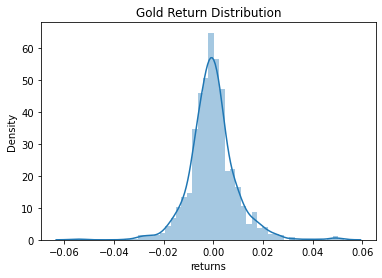

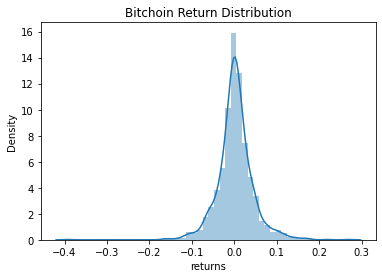

<Figure size 432x288 with 0 Axes>

In [21]:
f = sns.distplot(gold_df['returns']).set_title('Gold Return Distribution')
plt.figure()
g = sns.distplot(btc_df['returns']).set_title('Bitchoin Return Distribution')
plt.figure()

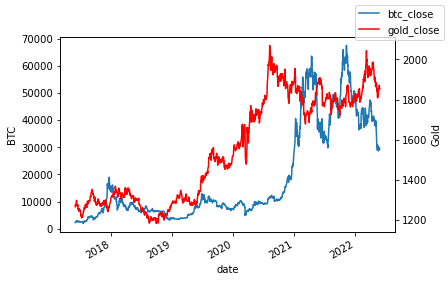

Correlation between Gold and BTC: 67.57%


In [46]:
ax = df.plot(x="date", y="btc_close", legend=False)
ax2 = ax.twinx()
df.plot(x="date", y="gold_close", ax=ax2, legend=False, color="r")
ax.figure.legend()
ax.set_ylabel("BTC")
ax2.set_ylabel("Gold")
plt.show()
print(f"Correlation between Gold and BTC: {round(df['btc_close'].corr(df['gold_close']) * 100,2)}%")

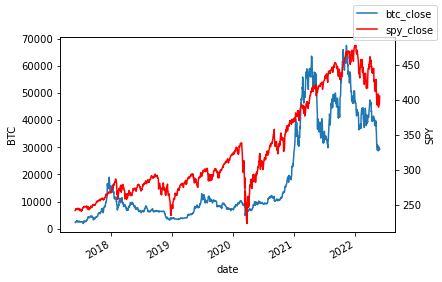

Correlation between SPY and BTC: 91.54%


In [74]:
ax = df.plot(x="date", y="btc_close", legend=False)
ax2 = ax.twinx()
df.plot(x="date", y="spy_close", ax=ax2, legend=False, color="r")
ax.figure.legend()
ax.set_ylabel("BTC")
ax2.set_ylabel("SPY")
plt.show()
print(f"Correlation between SPY and BTC: {round(df['btc_close'].corr(df['spy_close']) * 100,2)}%")

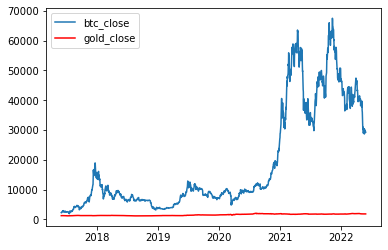

In [51]:
plt.plot(df['date'],df['btc_close'], label="btc_close")
plt.plot(df['date'],df['gold_close'], label="gold_close",color="r")
plt.legend()
plt.show()

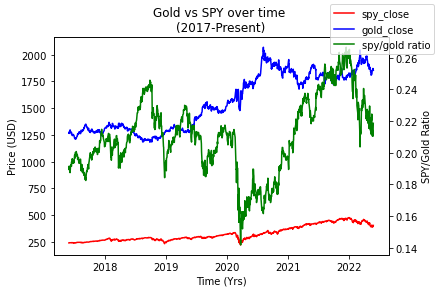

In [71]:
fig, ax1 = plt.subplots()
ax1.plot(df['date'],df['spy_close'],color = "r",label="spy_close")
ax1.plot(df['date'],df['gold_close'],color = "b",label="gold_close")
ax1.set_xlabel('Time (Yrs)')
ax1.set_ylabel('Price (USD)')

ax2 = ax1.twinx()

ax2.plot(df['date'],df['spy_close']/df['gold_close'],color = "g",label="spy/gold ratio")
ax2.set_ylabel('SPY/Gold Ratio')
plt.title('Gold vs SPY over time \n(2017-Present)')
fig.legend()
plt.show()

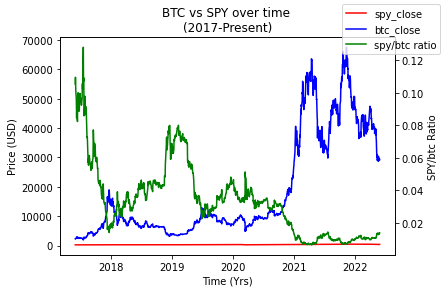

In [73]:
fig, ax1 = plt.subplots()
ax1.plot(df['date'],df['spy_close'],color = "r",label="spy_close")
ax1.plot(df['date'],df['btc_close'],color = "b",label="btc_close")
ax1.set_xlabel('Time (Yrs)')
ax1.set_ylabel('Price (USD)')

ax2 = ax1.twinx()

ax2.plot(df['date'],df['spy_close']/df['btc_close'],color = "g",label="spy/btc ratio")
ax2.set_ylabel('SPY/btc Ratio')
plt.title('BTC vs SPY over time \n(2017-Present)')
fig.legend()
plt.show()     

### Conclusions ###

    - Due to the near 70% correlation to gold, BTC has become an option for a diversifying investments away from traditional securities markets. Though it has more volatility, and thus is likely best suited for investors with a longer term investment horizon, the asset seems to have value when traditional markets show heightened volatility.
    -  With the 91% correlation between BTC and SPY, BTC has been marketed as a diversifier to equities but in reality it has a very high relationship with equity performance. BTC has also been marketed as digital gold, and while it does show some correlation to gold, it has much higher levels of volatility.